In [10]:
using AlgebraicPetri
using AlgebraicPetri.ModelComparison
using Catlab
using Catlab.CategoricalAlgebra
using Catlab.Programs
using Catlab.WiringDiagrams
using Catlab.Graphics.Graphviz
using Catlab.Graphics.Graphviz: Html
using Plots
using JSON
using LabelledArrays
using PrettyTables
using Catlab.WiringDiagrams, Catlab.Graphics

using GraphViz

#### Test dynamically composing two models together
@relation macro does not allow dynamic contruction of the composition-patterns, it so needs to be built from the grounds up.

See https://github.com/AlgebraicJulia/Catlab.jl/issues/719

Go back to the basics and using `add_parts` for everything.

Note that RelationDiagram seeiming needs to be of UntypedUnnamedRelationDiagram type (e.g. assing in nothing for port names), otherwise oapply wouldn't work and error out.

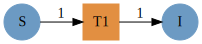

In [11]:
# SI Model
SI = Open(LabelledPetriNet([:S, :I],
  :T1 => ((:S) => (:I))
))
Graph(SI)

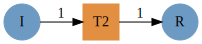

In [12]:
# IR model
IR = Open(LabelledPetriNet([:I, :R],
  :T2 => ((:I) => (:R))
))
Graph(IR)

#### Here the notebook version would do someting like this to create SIR

```
patternMacro = @relation (S, I, R) where (S, I, R) begin
  SI(S, I)
  IR(I, R)
end

SIR = oapply(patternMacro, Dict(
  :SI => SI,
  :IR => IR
)) |> apex

Graph(SIR)
```

In [9]:
# Emulate the relation macro
d = RelationDiagram(0, port_names=nothing)
add_parts!(d, :Box, 1, name=Symbol("SI"))
add_parts!(d, :Box, 1, name=Symbol("IR"))
add_parts!(d, :Junction, 1, variable=Symbol("S"))
add_parts!(d, :Junction, 1, variable=Symbol("I"))
add_parts!(d, :Junction, 1, variable=Symbol("R"))
add_parts!(d, :Port, 1, box=1, junction=1)
add_parts!(d, :Port, 1, box=1, junction=2)
add_parts!(d, :Port, 1, box=2, junction=2)
add_parts!(d, :Port, 1, box=2, junction=3)
add_parts!(d, :OuterPort, 1, outer_junction=1)
add_parts!(d, :OuterPort, 1, outer_junction=2)
add_parts!(d, :OuterPort, 1, outer_junction=3)

3:3

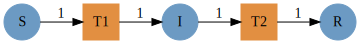

In [8]:
# Now run oapply
SIR = oapply(d, Dict(
  :SI => SI,
  :IR => IR
)) |> apex

Graph(SIR)